In [2]:
import pandas as pd
import jsonlines

In [3]:
df_llama3_8b_bertaqa_en_fn = pd.read_json('C:/Users/dilee/Desktop/seminar/llama3 8B finetuned/bertaqa_en_5-shot/samples_bertaqa_en_2025-03-06T16-02-42.157357.jsonl',lines=True)
df_llama3_8b_bertaqa_eu_fn = pd.read_json('C:/Users/dilee/Desktop/seminar/llama3 8B finetuned/bertaqa_eu_5-shot/samples_bertaqa_eu_2025-03-06T15-59-45.387781.jsonl',lines=True)

In [4]:
merged = pd.DataFrame()

In [5]:
merged["D=EN Llama3-8B-finetuned"] = df_llama3_8b_bertaqa_en_fn["acc"]
merged["D=EU Llama3-8B-finetuned"] = df_llama3_8b_bertaqa_eu_fn["acc"]


,0
D=EN Llama3-8B-finetuned,62.24
D=EU Llama3-8B-finetuned,49.52


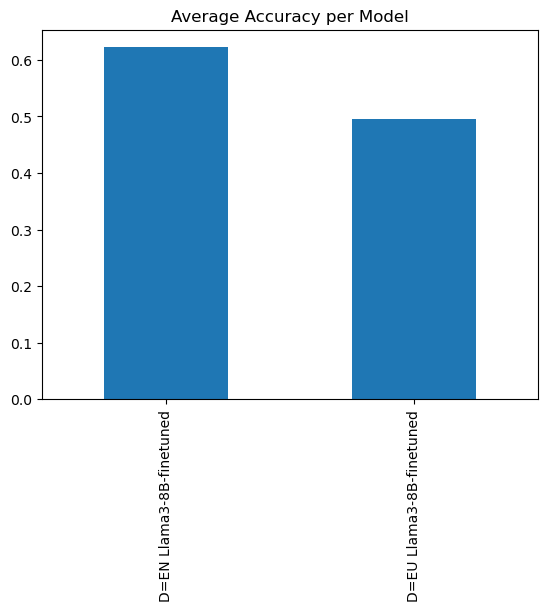

In [6]:
   # plot average accuracy per model
merged_mean = merged.mean()
merged_mean.plot(kind="bar", rot=90, title="Average Accuracy per Model")
display(pd.DataFrame((merged_mean* 100).round(2)))

In [7]:
merged["group"] = df_llama3_8b_bertaqa_en_fn["doc"].apply(lambda x: x["group"] if x["group"] != "Nazioarteko gaiak" else "Gai orokorrak")
merged["difficulty"] = df_llama3_8b_bertaqa_en_fn["doc"].apply(lambda x: x["difficulty"])
merged["category"] = df_llama3_8b_bertaqa_en_fn["doc"].apply(lambda x: x["category"])

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Create a dictionary to map Basque group names to English
group_translation = {
    "Euskara eta literatura": "Basque Language and Literature",
    "Geografia eta Historia": "Geography and History",
    "Gizartea eta ohiturak": "Society and Traditions",
    "Kirola eta aisialdia": "Sports and Leisure",
    "Kultura eta artea": "Culture and Art",
    "Musika eta dantza": "Music and Dance",
    "Zientzia eta teknologia": "Science and Technology",
    "Zinema eta ikuskizunak": "Cinema and Shows",
    "Gai orokorrak": "General Topics",
    "Euskal gaiak": "Basque Issues"
}

# Function to translate Basque groups to English
def translate_group(group_name):
    return group_translation.get(group_name, group_name)

In [15]:
def plot_eus_en_size(df_llama3_8b_bertaqa_en_fn,df_llama3_8b_bertaqa_eu_fn):
    merged = pd.DataFrame()


    merged["D=EN Llama3-8B-finetuned"] = df_llama3_8b_bertaqa_en_fn["acc"]
    merged["D=EU Llama3-8B-finetuned"] = df_llama3_8b_bertaqa_eu_fn["acc"]

    # Ensure to only compute mean on numeric columns (e.g., accuracy)
    merged_numeric = merged.select_dtypes(include=['float64', 'int64'])
    # plot average accuracy per model
    merged_mean = merged_numeric.mean()
    merged_mean.plot(kind="bar", rot=90, title="Average Accuracy per Model")
    display(pd.DataFrame((merged_mean* 100).round(2)))

    #merged["group"] = df_llama3_8b_bertaqa_en_fn["doc"].apply(lambda x: x["group"] if x["group"] != "Nazioarteko gaiak" else "Gai orokorrak")
    merged["group"] = df_llama3_8b_bertaqa_eu_fn["doc"].apply(lambda x: translate_group(x["group"]) if x["group"] != "Nazioarteko gaiak" else "General Topics")
    merged["difficulty"] = df_llama3_8b_bertaqa_eu_fn["doc"].apply(lambda x: x["difficulty"])
    merged["category"] = df_llama3_8b_bertaqa_eu_fn["doc"].apply(lambda x: translate_group(x["category"]))

    merged_grouped = merged.groupby("group").mean(numeric_only=True)
    merged_grouped_difficulty = merged.groupby("difficulty").mean(numeric_only=True)
    merged_grouped_category = merged.groupby("category").mean(numeric_only=True)
    # remove difficulty from merged_grouped and merged_grouped_category
    merged_grouped.drop("difficulty", axis=1, inplace=True)
    merged_grouped_category.drop("difficulty", axis=1, inplace=True)
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    merged_grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    merged_grouped_difficulty.plot(kind="bar", ax=axs[2], rot=0, title="Accuracy by Difficulty")
    merged_grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    
    # multiply by 100 and round to 1 decimal place
    display((merged_grouped.T * 100).round(2))
    display((merged_grouped_difficulty.T * 100).round(2))
    display((merged_grouped_category.T * 100).round(2))
    
    # add plot that combines group and category
    merged_group_category = merged.groupby(["category", "group"]).mean(numeric_only=True)
    merged_group_category.drop("difficulty", axis=1, inplace=True)
    # merged_group_category.plot(kind="bar", rot=90, title="Accuracy by Category and Group")
    # make this plot bigger
    plt.gcf().set_size_inches(20, 6)
    display((merged_group_category.T * 100).round(2))
    
    # add plot that combines group and difficulty
    merged_group_difficulty = merged.groupby(["difficulty", "group"]).mean(numeric_only=True)
    display((merged_group_difficulty.T * 100).round(2))
    merged_group_difficulty.plot(kind="bar", rot=90, title="Accuracy by Group and Difficulty")

,0
D=EN Llama3-8B-finetuned,62.24
D=EU Llama3-8B-finetuned,49.52


group,Basque Issues,General Topics
D=EN Llama3-8B-finetuned,49.41,74.92
D=EU Llama3-8B-finetuned,41.29,57.65


difficulty,1,2,3
D=EN Llama3-8B-finetuned,70.23,60.93,53.85
D=EU Llama3-8B-finetuned,54.21,49.34,43.83


category,Basque Language and Literature,Cinema and Shows,Culture and Art,Geography and History,Music and Dance,Science and Technology,Society and Traditions,Sports and Leisure
D=EN Llama3-8B-finetuned,60.49,62.81,64.03,64.83,52.46,69.05,64.05,60.27
D=EU Llama3-8B-finetuned,51.71,51.26,52.32,53.00,42.61,51.02,49.40,44.74


category                 Basque Language and Literature                 \
group                                     Basque Issues General Topics   
D=EN Llama3-8B-finetuned                          51.80          69.03   
D=EU Llama3-8B-finetuned                          47.54          55.81   

category                 Cinema and Shows                Culture and Art  \
group                       Basque Issues General Topics   Basque Issues   
D=EN Llama3-8B-finetuned            46.98          78.60           50.17   
D=EU Llama3-8B-finetuned            39.93          62.54           41.36   

category                                Geography and History                 \
group                    General Topics         Basque Issues General Topics   
D=EN Llama3-8B-finetuned          78.32                 52.67          77.00   
D=EU Llama3-8B-finetuned          63.64                 43.67          62.33   

category                 Music and Dance                 \
group                      Basque Issues General Topics   
D=EN Llama3-8B-finetuned           38.75          65.67   
D=EU Llama3-8B-finetuned           35.29          49.67   

category                 Science and Technology                 \
group                             Basque Issues General Topics   
D=EN Llama3-8B-finetuned                  58.22          79.73   
D=EU Llama3-8B-finetuned                  43.15          58.78   

category                 Society and Traditions                 \
group                             Basque Issues General Topics   
D=EN Llama3-8B-finetuned                  50.52          77.18   
D=EU Llama3-8B-finetuned                  41.87          56.71   

category                 Sports and Leisure                 
group                         Basque Issues General Topics  
D=EN Llama3-8B-finetuned              45.95          74.26  
D=EU Llama3-8B-finetuned              37.16          52.15

difficulty                           1                            2  \
group                    Basque Issues General Topics Basque Issues   
D=EN Llama3-8B-finetuned         55.56          84.69         47.85   
D=EU Llama3-8B-finetuned         45.52          62.78         40.16   

difficulty                                          3                 
group                    General Topics Basque Issues General Topics  
D=EN Llama3-8B-finetuned          73.80         43.71          63.98  
D=EU Llama3-8B-finetuned          58.35         37.43          50.22

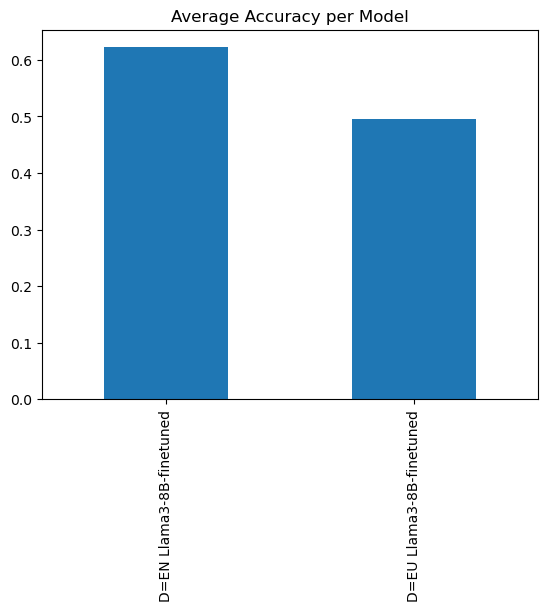

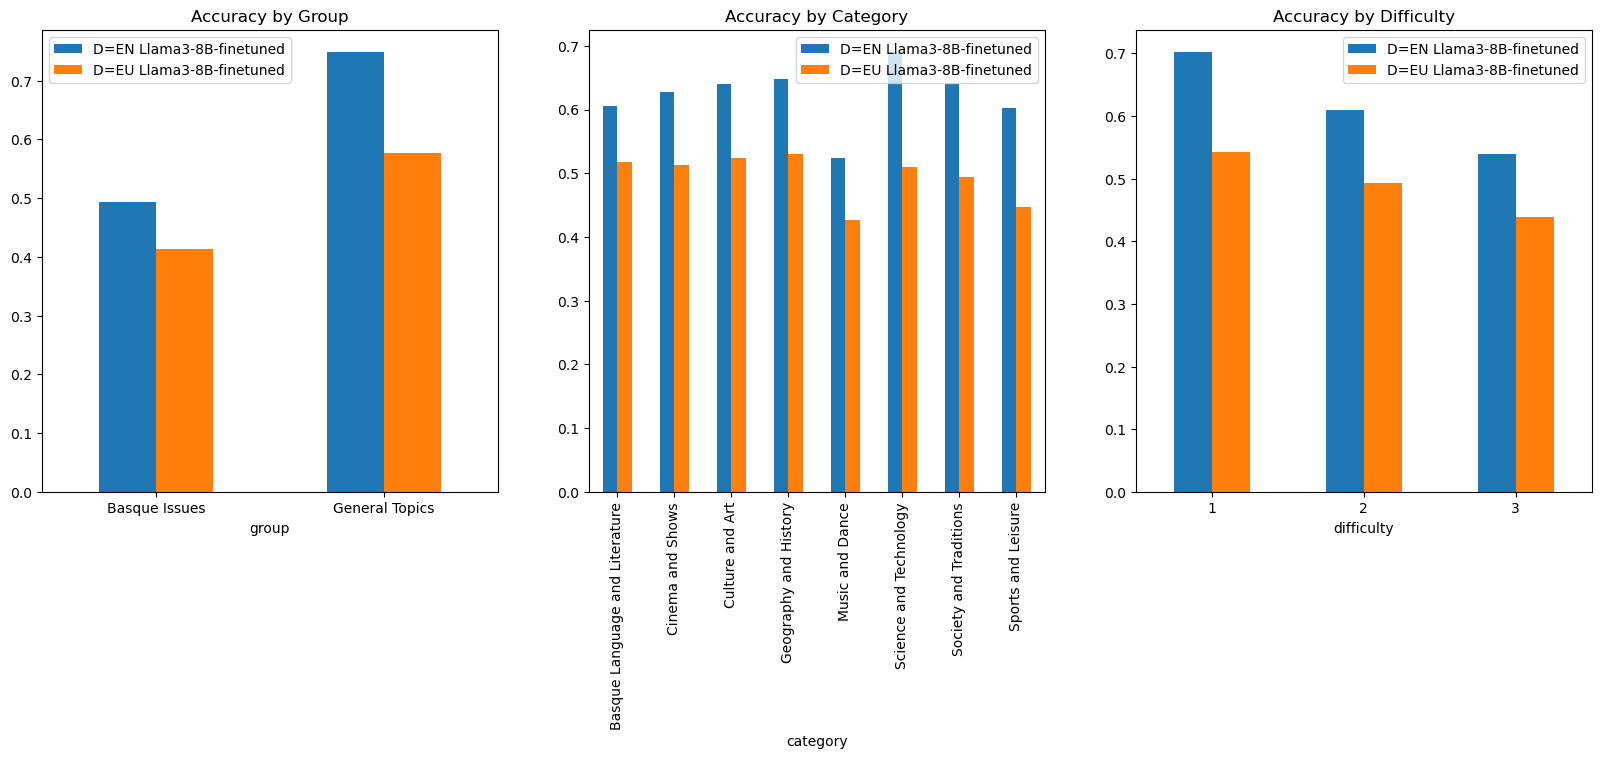

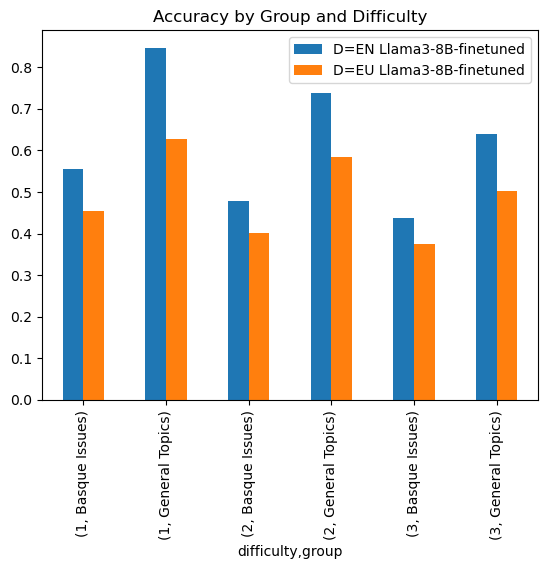

In [17]:
plot_eus_en_size(df_llama3_8b_bertaqa_en_fn,df_llama3_8b_bertaqa_eu_fn)